# Elman-type Recurrent Neural Network

http://willwolf.io/2016/10/18/recurrent-neural-network-gradients-and-lessons-learned-therein/

http://colah.github.io/posts/2015-08-Backprop/

http://www.wildml.com/2015/10/recurrent-neural-networks-tutorial-part-3-backpropagation-through-time-and-vanishing-gradients/

### Model
Context dependent model  
$h_t = \sigma(W_1 x_t + W_r h_{t-1} + b_1)$ from $t=1$  
$\hat{y_t} = \sigma(W_2 h_t + b_2)$  
$h_0$: initial state, for simplicity, we can set it to a 0-vector

### Forward model:
$$
u_1^{(t)} = W_1 x^{(t)} + W_r h^{(t-1)} + b_1
$$
$$
h^{(t)} = \tanh(u_1^{(t)})
$$
$$
u_2^{(t)} = W_2 h^{(t)} + b_2
$$
$$
\hat{y}^{(t)} = \tanh(u_2^{(t)})
$$
$$
L^{(t)} = || \hat{y}^{(t)} - y^{(t)}||_2^2
$$

## It helps to draw a graph of the RNN to really understand how to calculate the gradients needed to update the parameters:

<img src="RNN_graph.png" alt="Drawing" style="width: 1200px;"/>

## Calculating the Gradients:

Because in a recurrent neural network we need to fit the parameters in such a way that the error is minimized at ALL the timesteps, we **sum** over all the gradients of time-specific losses:

$$
\begin{equation}
\frac {\partial L^{(t)}}{\partial W_1} = \frac {\partial L^{(t)}}{\partial \hat{y}^{(t)}} \frac {\partial \hat{y}^{(t)}}{\partial u_2^{(t)}}\frac {\partial u_2^{(t)}}{\partial h^{(t)}}\frac {\partial h^{(t)}}{\partial u_1^{(t)}}\frac {\partial u_1^{(t)}}{\partial W_1}
\quad\mathrm{\Rightarrow}\quad
\frac {\partial L}{\partial W_1} = \sum_{t=0}^T \frac {\partial L^{(t)}}{\partial \hat{y}^{(t)}} \frac {\partial \hat{y}^{(t)}}{\partial u_2^{(t)}}\frac {\partial u_2^{(t)}}{\partial h^{(t)}}\frac {\partial h^{(t)}}{\partial u_1^{(t)}}\frac {\partial u_1^{(t)}}{\partial W_1}
\end{equation}
$$

$$
\begin{equation}
\frac {\partial L^{(t)}}{\partial W_r} = \frac {\partial L^{(t)}}{\partial \hat{y}^{(t)}} \frac {\partial \hat{y}^{(t)}}{\partial u_2^{(t)}}\frac {\partial u_2^{(t)}}{\partial h^{(t)}}\frac {\partial h^{(t)}}{\partial u_1^{(t)}}\frac {\partial u_1^{(t)}}{\partial W_r}
\quad\mathrm{\Rightarrow}\quad
\frac {\partial L}{\partial W_r} = \sum_{t=0}^T \frac {\partial L^{(t)}}{\partial \hat{y}^{(t)}} \frac {\partial \hat{y}^{(t)}}{\partial u_2^{(t)}}\frac {\partial u_2^{(t)}}{\partial h^{(t)}}\frac {\partial h^{(t)}}{\partial u_1^{(t)}}\frac {\partial u_1^{(t)}}{\partial W_r}
\end{equation}
$$

$$
\begin{equation}
\frac {\partial L^{(t)}}{\partial b_1} = \frac {\partial L^{(t)}}{\partial \hat{y}^{(t)}} \frac {\partial \hat{y}^{(t)}}{\partial u_2^{(t)}}\frac {\partial u_2^{(t)}}{\partial h^{(t)}}\frac {\partial h^{(t)}}{\partial u_1^{(t)}}\frac {\partial u_1^{(t)}}{\partial b_1}
\quad\mathrm{\Rightarrow}\quad
\frac {\partial L}{\partial b_1} = \sum_{t=0}^T \frac {\partial L^{(t)}}{\partial \hat{y}^{(t)}} \frac {\partial \hat{y}^{(t)}}{\partial u_2^{(t)}}\frac {\partial u_2^{(t)}}{\partial h^{(t)}}\frac {\partial h^{(t)}}{\partial u_1^{(t)}}\frac {\partial u_1^{(t)}}{\partial b_1}
\end{equation}
$$

$$
\begin{equation}
\frac {\partial L^{(t)}}{\partial W_2} = \frac {\partial L^{(t)}}{\partial \hat{y}^{(t)}} \frac {\partial \hat{y}^{(t)}}{\partial u_2^{(t)}} \frac {\partial u_2^{(t)}}{\partial W_2}
\quad\mathrm{\Rightarrow}\quad
\frac {\partial L^{(t)}}{\partial W_2} = \sum_{t=0}^T \frac {\partial L^{(t)}}{\partial \hat{y}^{(t)}} \frac {\partial \hat{y}^{(t)}}{\partial u_2^{(t)}} \frac {\partial u_2^{(t)}}{\partial W_2}
\end{equation}
$$

$$
\begin{equation}
\frac {\partial L^{(t)}}{\partial b_2} = \frac {\partial L^{(t)}}{\partial \hat{y}^{(t)}} \frac {\partial \hat{y}^{(t)}}{\partial u_2^{(t)}} \frac {\partial u_2^{(t)}}{\partial b_2}
\quad\mathrm{\Rightarrow}\quad
\frac {\partial L^{(t)}}{\partial b_2} = \sum_{t=0}^T \frac {\partial L^{(t)}}{\partial \hat{y}^{(t)}} \frac {\partial \hat{y}^{(t)}}{\partial u_2^{(t)}} \frac {\partial u_2^{(t)}}{\partial b_2}
\end{equation}
$$

$$
\boxed{\frac {\partial L^{(t)}}{\partial \hat{y}^{(t)}} = 2(\hat{y}^{(t)} - y^{(t)})}
$$

Because $\frac {d}{dx} \tanh(x) = 1 - \tanh^2(x) $ and because according to the forward model 
$\hat{y}^{(t)} = \tanh(u_2^{(t)})$ and $h^{(t)} = \tanh(u_1^{(t)})$:


$$
\begin{equation}
\boxed{\frac {\partial \hat{y}^{(t)}}{\partial u_2^{(t)}} = 1 - \tanh^2(u_2^{(t)}) = 1 - (\hat{y}^{(t)})^2}
\quad\mathrm{and}\quad 
\boxed{\frac {\partial u_2^{(t)}}{\partial h^{(t)}} = W_2}
\quad\mathrm{and}\quad 
\boxed{\frac {\partial h^{(t)}}{\partial u_1^{(t)}} = 1 - \tanh^2(u_1^{(t)}) = 1 - (h^{(t)})^2}
\end{equation}
$$


$$
\begin{equation}
\boxed{\frac {\partial u_1^{(t)}}{\partial W_1} = x^{(t)}}
\quad\mathrm{and}\quad
\boxed{\frac {\partial u_1^{(t)}}{\partial W_r} = h^{(t-1)}}
\quad\mathrm{and}\quad 
\boxed{\frac {\partial u_1^{(t)}}{\partial b_1} = 1}
\quad\mathrm{and}\quad 
\boxed{\frac {\partial u_2^{(t)}}{\partial W_2} = h^{(t)}}
\quad\mathrm{and}\quad 
\boxed{\frac {\partial u_2^{(t)}}{\partial b_2} = 1}
\end{equation}
$$

## so finally:

$$
\frac {\partial L}{\partial W_1} = \sum_{t=0}^T 2(\hat{y}^{(t)} - y^{(t)})(1- (\hat{y}^{(t)})^2) W_2 (1 - {(h^{(t)})}^2) x^{(t)}
$$

$$
\frac {\partial L}{\partial W_r} = \sum_{t=0}^T 2(\hat{y}^{(t)} - y^{(t)})(1- (\hat{y}^{(t)})^2) W_2 (1 - {(h^{(t)})}^2) h^{(t-1)}
$$

$$
\frac {\partial L}{\partial b_1} = \sum_{t=0}^T 2(\hat{y}^{(t)} - y^{(t)})(1- (\hat{y}^{(t)})^2) W_2 (1 - {(h^{(t)})}^2)
$$

$$
\frac {\partial L}{\partial W_2} = \sum_{t=0}^T 2(\hat{y}^{(t)} - y^{(t)})(1- (\hat{y}^{(t)})^2) h^{(t)}
$$

$$
\frac {\partial L}{\partial b_2} = \sum_{t=0}^T 2(\hat{y}^{(t)} - y^{(t)})(1- (\hat{y}^{(t)})^2)
$$

In [1]:
# Imports
import sys
import numpy as np  # Matrix and vector computation package
import matplotlib
import matplotlib.pyplot as plt  # Plotting library
from matplotlib import cm  # Colormaps
from matplotlib.colors import LogNorm
import seaborn as sns  # Fancier plots

# Set seaborn plotting style
sns.set_style('darkgrid')

# progress bar that looks nice:
def printProgressBar (iteration, total, prefix='', suffix='', loss=0, decimals=1, length=100, fill='█'):
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    sys.stdout.write('\r%s |%s| %s%% %s %s %.4f |' % (prefix, bar, percent, suffix, '| loss: ', loss))
    sys.stdout.flush()
    # Print New Line on Complete
    if iteration == total: 
        print()

In [2]:
class RNN():
    
    def __init__(self, in_dim, h_dim, out_dim):
        self.h_dim = h_dim
        self.h = np.zeros((self.h_dim,1))
        self.W1 = np.random.randn(h_dim, in_dim)
        self.W2 = np.random.randn(out_dim, h_dim,) ###
        self.Wr = np.random.randn(h_dim,h_dim)  
        self.b1 = np.random.randn(h_dim,1)
        self.b2 = np.random.randn(out_dim,1) ###
        self.x =     np.zeros((in_dim,1))
        self.y =     np.zeros((out_dim,1))   ###
        self.y_hat = np.zeros((out_dim,1))   ###
        self.loss  = 0
        self.zero_grad()

    def zero_grad(self):
        self.dLdW1 = np.zeros_like(self.W1)
        self.dLdWr = np.zeros_like(self.Wr)
        self.dLdW2 = np.zeros_like(self.W2)
        self.dLdb1 = np.zeros_like(self.b1)
        self.dLdb2 = np.zeros_like(self.b2)
        
        self.loss = 0
        
        self.Y = []
        self.Y_hat = []
        self.X  = []
        self.H  = []
        self.H.append(np.zeros((self.h_dim,1))) # initialize zeroeth to zeros
                
    # forward pass:
    def forward(self):
        self.u1 = self.W1.dot(self.x) + self.Wr.dot(self.H[-1]) + self.b1
        self.h = np.tanh(self.u1)
        self.u2 = self.W2.dot(self.h) + self.b2
        self.y_hat = np.tanh(self.u2)
        self.loss += np.sum((self.y_hat - self.y)**2)
        
        self.X.append(np.copy(self.x))
        self.Y_hat.append(np.copy(self.y_hat))
        self.H.append(np.copy(self.h))
        self.Y.append(np.copy(self.y))
    
               
    # backward pass:
    def backward(self):
        
        for t in reversed(range(len(self.X))):
            self.dLdW1 += (2*(self.Y_hat[t]-self.Y[t])*(1-self.Y_hat[t]**2)).T.dot(self.W2).T * (1-self.H[t]**2).dot(self.X[t].T)
            self.dLdWr += (2*(self.Y_hat[t]-self.Y[t])*(1-self.Y_hat[t]**2)).T.dot(self.W2).T * (1-self.H[t]**2).dot(self.H[t-1].T)
            self.dLdb1 += (2*(self.Y_hat[t]-self.Y[t])*(1-self.Y_hat[t]**2)).T.dot(self.W2).T * (1-self.H[t]**2)
            self.dLdW2 += (2*(self.Y_hat[t]-self.Y[t])*(1-self.Y_hat[t]**2)).dot(self.H[t].T)
            self.dLdb2 += (2*(self.Y_hat[t]-self.Y[t])*(1-self.Y_hat[t]**2))

    def step(self, lrate):
        
        min_clip_value = -10
        max_clip_value = 10
        
        if self.dLdW1.max() > max_clip_value:
            self.dLdW1[self.dLdW1 > max_clip_value] = max_clip_value
        if self.dLdWr.max() > max_clip_value:
            self.dLdWr[self.dLdWr > max_clip_value] = max_clip_value
        if self.dLdW2.max() > max_clip_value:
            self.dLdW2[self.dLdW2 > max_clip_value] = max_clip_value
        if self.dLdb1.max() > max_clip_value:
            self.dLdb1[self.dLdb1 > max_clip_value] = max_clip_value
        if self.dLdb2.max() > max_clip_value:
            self.dLdb2[self.dLdb2 > max_clip_value] = max_clip_value
            
        if self.dLdW1.min() < min_clip_value:
            self.dLdW1[self.dLdW1 > min_clip_value] = min_clip_value
        if self.dLdWr.min() < min_clip_value:
            self.dLdWr[self.dLdWr > min_clip_value] = min_clip_value
        if self.dLdW2.min() < min_clip_value:
            self.dLdW2[self.dLdW2 < min_clip_value] = min_clip_value
        if self.dLdb1.min() < min_clip_value:
            self.dLdb1[self.dLdb1 > min_clip_value] = min_clip_value
        if self.dLdb2.min() < min_clip_value:
            self.dLdb2[self.dLdb2 > min_clip_value] = min_clip_value
                
        self.W1 -= lrate * self.dLdW1
        self.W2 -= lrate * self.dLdW2
        self.Wr -= lrate * self.dLdWr
        self.b1 -= lrate * self.dLdb1
        self.b2 -= lrate * self.dLdb2

In [3]:
N = 100

def get_lemniscat(size=100, a=1, offset=0):
    t = np.linspace(np.pi/2, 4.5*np.pi, size)
    x = a*np.cos(t)/(1+np.sin(t)**2) + offset
    y = a*np.sin(t)*np.cos(t)/(1+np.sin(t)**2) + offset
    x = np.vstack((x,y)).transpose(1,0)
    y = np.roll(x, -1, axis=0)
    return x, y

# x,y = get_lemniscat(size=N, a=0.5)

def generate_data(N=100):
    theta = np.linspace(-2*np.pi, 2*np.pi, N).reshape(-1, 1)
    x = np.concatenate((0.25 * np.cos(theta), 0.25 * np.sin(theta)), axis=1) 
    y = np.roll(x, -1, axis=0)
    return x, y

x,y = generate_data(N=N)

In [11]:
np.random.seed(seed=11)
batch_size = N
in_dim, h_dim, out_dim = 2,3,2
rnn = RNN(in_dim, h_dim, out_dim)

Progress: |██████████████████████████████████████████████████| 100.0% Complete | loss:  0.0624 |


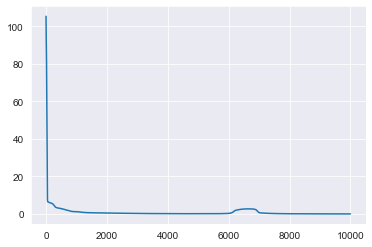

In [12]:
EPOCHS = 10000

loss = []
printProgressBar(0, EPOCHS, prefix = 'Progress:', suffix = 'Complete', length = 50)
for epoch in range(EPOCHS):
    rnn.zero_grad()
    for idx in range(N):
        rnn.x = x[idx,:].reshape(-1,1)
        rnn.y = y[idx,:].reshape(-1,1)
        rnn.forward()
    rnn.backward()
    rnn.step(0.001)
    loss.append(rnn.loss)
    printProgressBar(epoch + 1, EPOCHS, prefix='Progress:', loss=loss[-1], suffix='Complete', length=50)
    
p = plt.plot(loss)

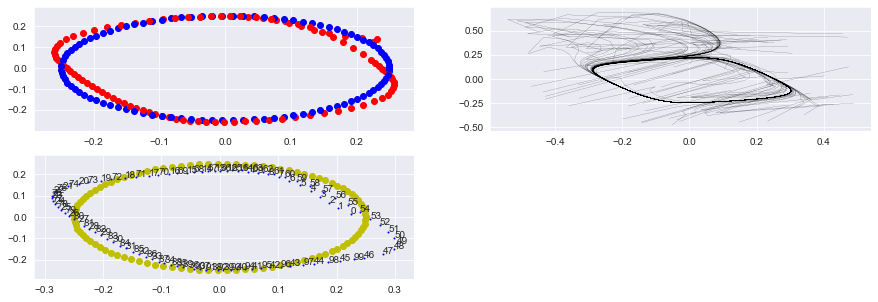

In [13]:
%matplotlib inline
plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
for i in range(N):
    plt.scatter(rnn.X[i][0], rnn.X[i][1], c='b')
    plt.scatter(rnn.Y_hat[i][0], rnn.Y_hat[i][1], c='r')
    
plt.subplot(2,2,2)
for j in range (100):
    out = np.random.uniform(low=-0.5, high=0.5, size=(2,1))
    OUT0, OUT1 = [], []
    for i in range(100):
        OUT0.append(out[0,0])
        OUT1.append(out[1,0])
        rnn.x = out
        rnn.forward()
        out = rnn.y_hat.reshape(-1,1)
    plt.plot(OUT0, OUT1, linewidth=0.125, c='black')
                           
plt.subplot(2,2,3)
rnn.y_hat = x[0,:].reshape(-1,1)
for i in range(N):
    rnn.x = rnn.y_hat
    rnn.forward()
    plt.scatter(x[i,0],x[i,1], c='y')
    plt.scatter(rnn.y_hat[0,:], rnn.y_hat[1,:], c='b', s=1)
    plt.annotate(i, (rnn.y_hat[0,0], rnn.y_hat[1,0]))             


## Likewise, we can fit the RNN to a noisier dataset consisting of cursor-drawn points

**Note:**

To generate cursor-drawn points, run the following cell, place the cursor inside a window that pops up, hold down the touchpad, draw a figure of eight, release the touchpad (so the script stops capturing cursor coordinates), then press escape to finish.

In [4]:
import pygame
x = y = 0
running = 1
screen = pygame.display.set_mode((640, 400))
pos = []
down = 0
while running:
    event = pygame.event.poll()
    if event.type == pygame.KEYDOWN:
        if event.key==27:
            break
    if event.type == pygame.QUIT:
        running = 0
    elif event.type == pygame.MOUSEBUTTONDOWN:
        down = 1
        print('down')
    elif event.type == pygame.MOUSEBUTTONUP:
        down = 0
        print('up')
    elif event.type == pygame.MOUSEMOTION and down==1:
        pos.append((event.pos[0], event.pos[1]))
        screen.fill((0, 0, 0))
        pygame.display.flip()

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
down
up


Shape of inputs: (109, 2)
Shape of labels: (109, 2)


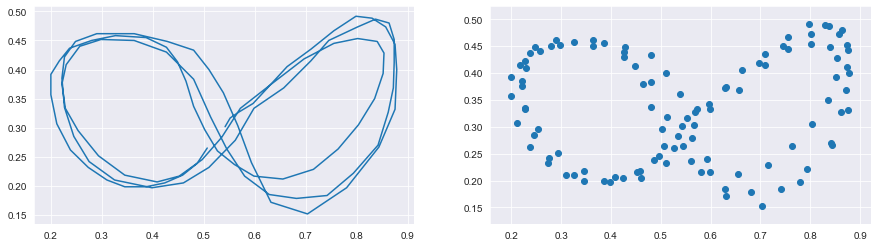

In [5]:
x = np.zeros((len(pos), 2))
for i in range(len(pos)):
    x[i,0] = pos[i][0]
    x[i,1] = pos[i][1]
    
x = x[0::5,:]/600
y = np.roll(x, -1, axis=0)

print('Shape of inputs: {}'.format(x.shape))
print('Shape of labels: {}'.format(y.shape))

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(x[:,0], y[:,1])
plt.subplot(1,2,2)
plt.scatter(x[:,0], y[:,1])

In [6]:
np.random.seed(seed=11)
N = len(x)
batch_size = N
in_dim, h_dim, out_dim = 2,3,2
rnn = RNN(in_dim, h_dim, out_dim)

In [7]:
EPOCHS = 10000

loss = []
printProgressBar(0, EPOCHS, prefix = 'Progress:', suffix = 'Complete', length = 50)
for epoch in range(EPOCHS):
    rnn.zero_grad()
    for idx in range(N):
        rnn.x = x[idx,:].reshape(-1,1)
        rnn.y = y[idx,:].reshape(-1,1)
        rnn.forward()
    rnn.backward()
    rnn.step(0.001)
    loss.append(rnn.loss)
    printProgressBar(epoch + 1, EPOCHS, prefix='Progress:', loss=loss[-1], suffix='Complete', length=50)
    
p = plt.plot(loss)

Progress: |███████████████████████████-----------------------| 54.3% Complete | loss:  0.7439 ||

KeyboardInterrupt: 

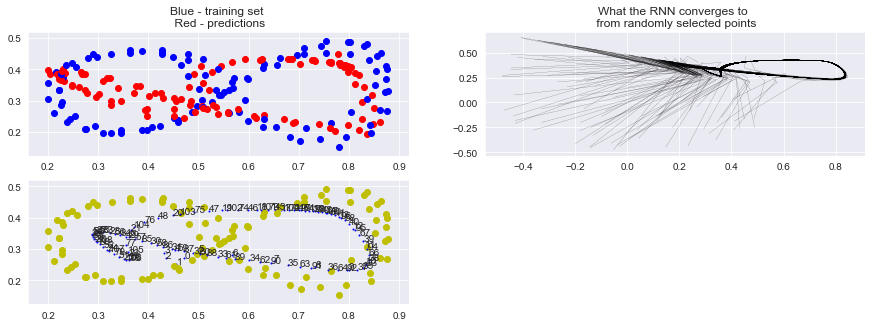

In [8]:
%matplotlib inline
plt.figure(figsize=(15,5))
plt.subplot(2,2,1)
for i in range(N):
    plt.scatter(rnn.X[i][0], rnn.X[i][1], c='b')
    plt.scatter(rnn.Y_hat[i][0], rnn.Y_hat[i][1], c='r')
plt.title ('Blue - training set \n Red - predictions')
    
plt.subplot(2,2,2)
for j in range (100):
    out = np.random.uniform(low=-0.5, high=0.5, size=(2,1))
    OUT0, OUT1 = [], []
    for i in range(100):
        OUT0.append(out[0,0])
        OUT1.append(out[1,0])
        rnn.x = out
        rnn.forward()
        out = rnn.y_hat.reshape(-1,1)
    plt.plot(OUT0, OUT1, linewidth=0.125, c='black')
plt.title('What the RNN converges to \n from randomly selected points')
                           
plt.subplot(2,2,3)
rnn.y_hat = x[0,:].reshape(-1,1)
for i in range(N):
    rnn.x = rnn.y_hat
    rnn.forward()
    plt.scatter(x[i,0],x[i,1], c='y')
    plt.scatter(rnn.y_hat[0,:], rnn.y_hat[1,:], c='b', s=1)
    plt.annotate(i, (rnn.y_hat[0,0], rnn.y_hat[1,0]))             
